<a href="https://colab.research.google.com/github/BeauCoomber/Programming-Assignment/blob/main/Programming(MAIN)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# File upload to Google Collabration
from google.colab import files
uploaded = files.upload()


Saving Medical_insurance.csv to Medical_insurance (4).csv


In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 1: Reading the dataset
*******************************
'''

# Read the dataset
data = pd.read_csv('Medical_insurance.csv')

# Remove duplicates
data = data.drop_duplicates()

# Inspect sample data
print("Sample Data:")
print(data.head())


Sample Data:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 2: Problem statement definition
*******************************
'''

# Display data shape
print("Dataset Shape:", data.shape)

# Display data size
print("Dataset Size:", data.size)

# Display data attributes
print("Dataset Attributes:", data.columns.tolist())

'''
Problem Statement:
We aim to predict the medical insurance charges ('charges') based on the following independent variables:
- age: Age of the individual
- sex: Gender (male/female)
- bmi: Body Mass Index - children: Number of children covered by insurance
- smoker: Smoking status (yes/no)
- region: Residential region
Target variable: charges
'''


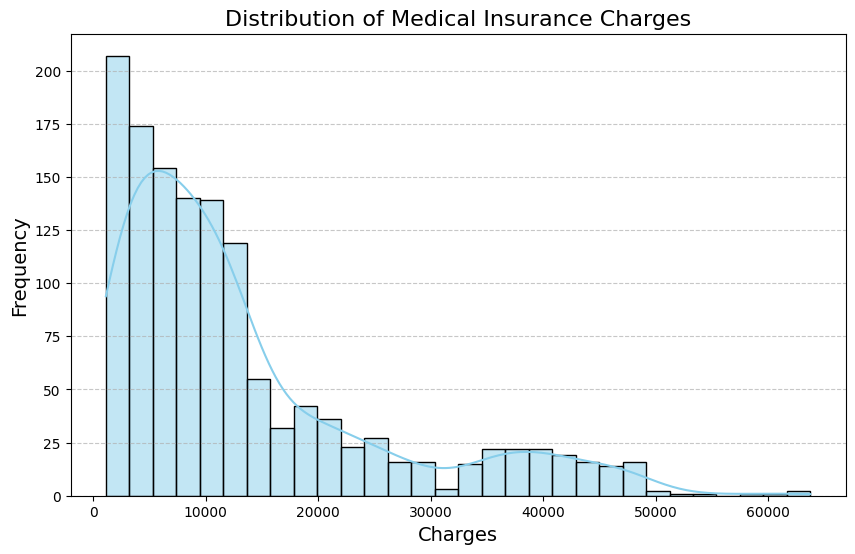

'\nThe data is right-skewed, indicating that most insurance charges are lower, with a few high outliers.\nThis suggests the need for preprocessing or transformation to handle skewness effectively in any predictive modeling.\n'

In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 3: Visualise the distribution of the target variable
*******************************
'''

import matplotlib.pyplot as plt
import seaborn as sns

# Graph implementation
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Medical Insurance Charges', fontsize=16)
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

'''
The data is right-skewed, indicating that most insurance charges are lower, with a few high outliers.
This suggests the need for preprocessing or transformation to handle skewness effectively in any predictive modeling.
'''


In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 4: Data exploration at basic level
*******************************
'''

# Volume of data
print("Dataset Shape (Rows, Columns):", data.shape)

# Dataset information to gauge overall data and data
print("\nDataset Info:")
print(data.info())

# Column identification (quantitative and categorical)
quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("\nQuantitative Columns:", quantitative_columns)
print("Categorical Columns:", categorical_columns)

# There are no unnecessary columns to remove at this stage
print("\nNo unwanted columns needed for removal.")


Dataset Shape (Rows, Columns): (1337, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None

Quantitative Columns: ['age', 'bmi', 'children', 'charges']
Categorical Columns: ['sex', 'smoker', 'region']

No unwanted columns needed for removal.


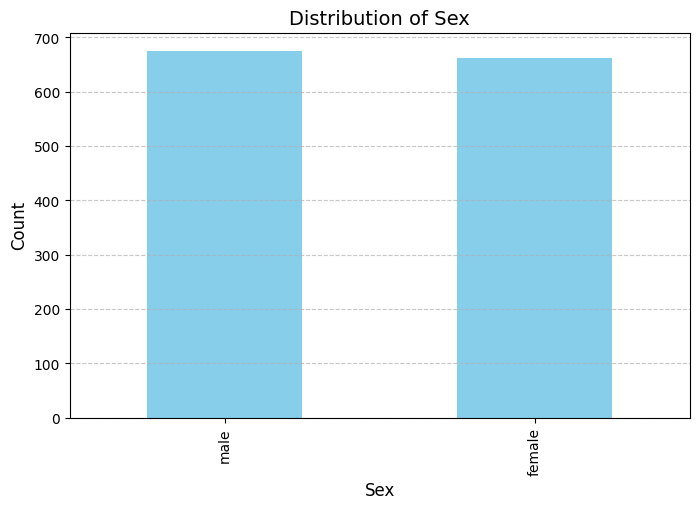

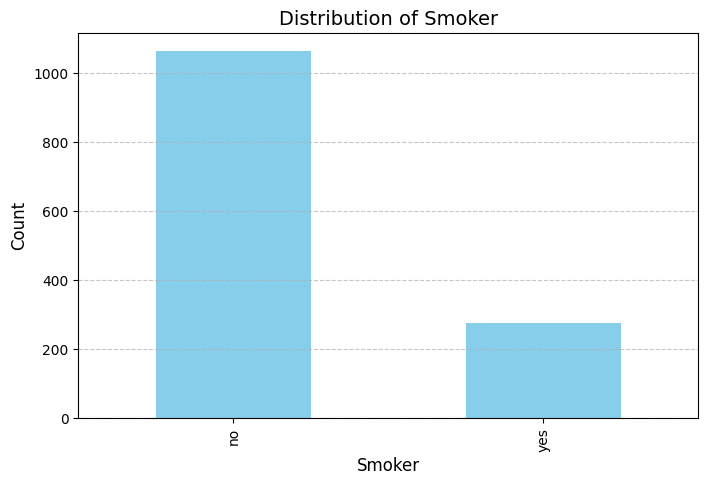

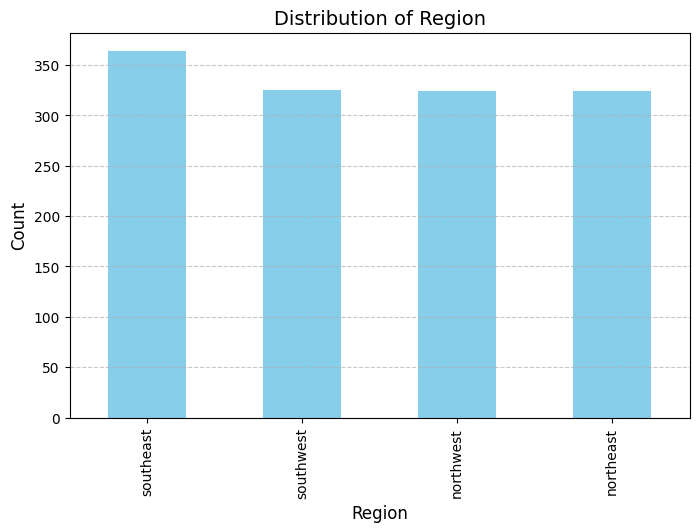

In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 5: Visual Exploratory Data Analysis (EDA) of data  (histograms)
*******************************
'''
# Visualising categorical variables
for column in ['sex', 'smoker', 'region']:
    plt.figure(figsize=(8, 5))
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column.capitalize()}', fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



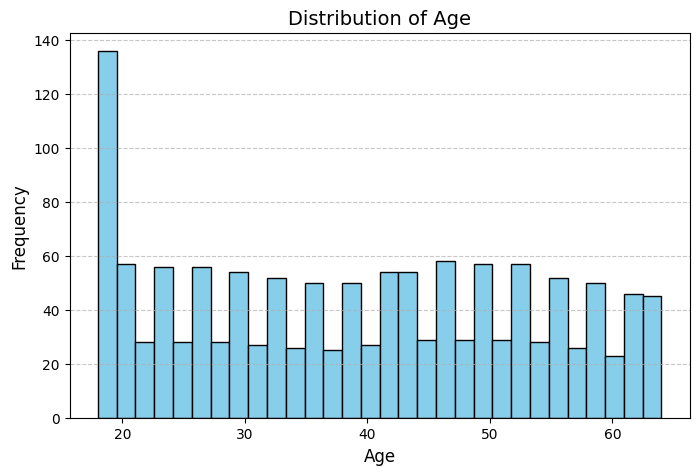

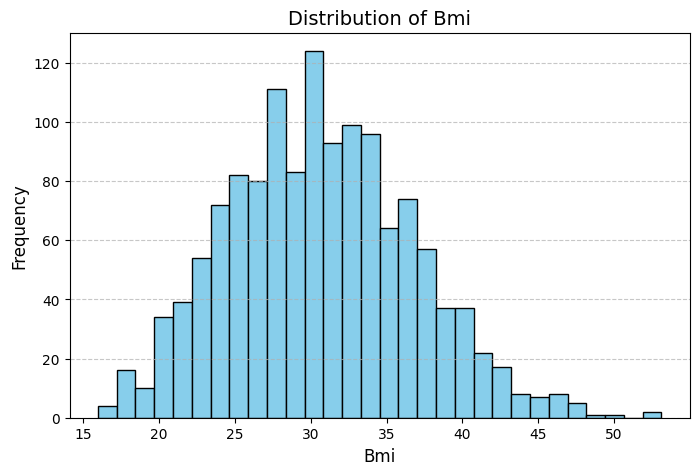

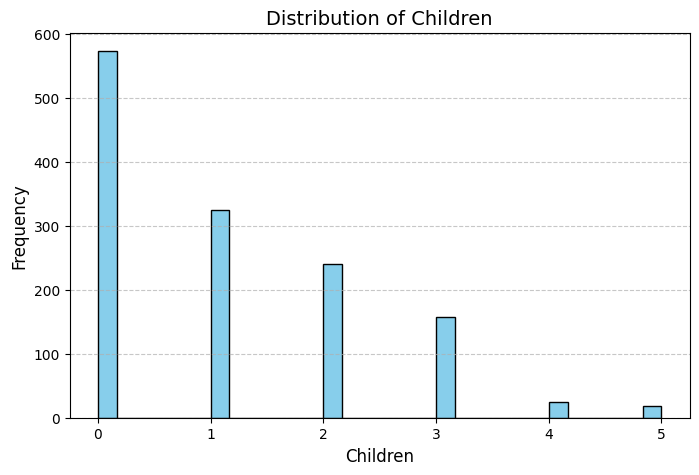

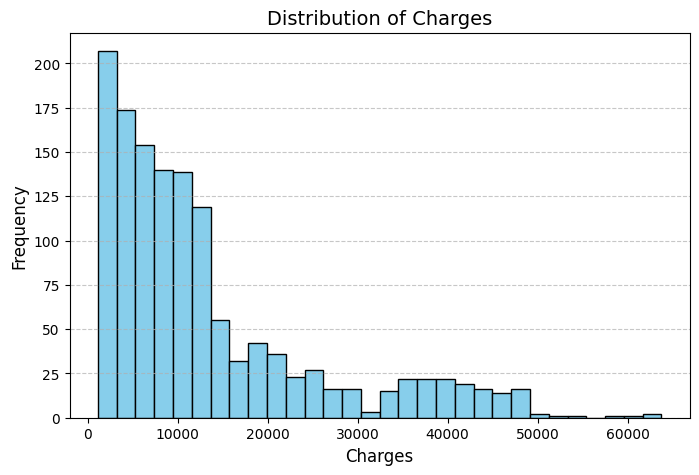

In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 5: Visual Exploratory Data Analysis (EDA) of data  (barcharts)
*******************************
'''

# Visualising continuous variables
for column in ['age', 'bmi', 'children', 'charges']:
    plt.figure(figsize=(8, 5))
    data[column].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column.capitalize()}', fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


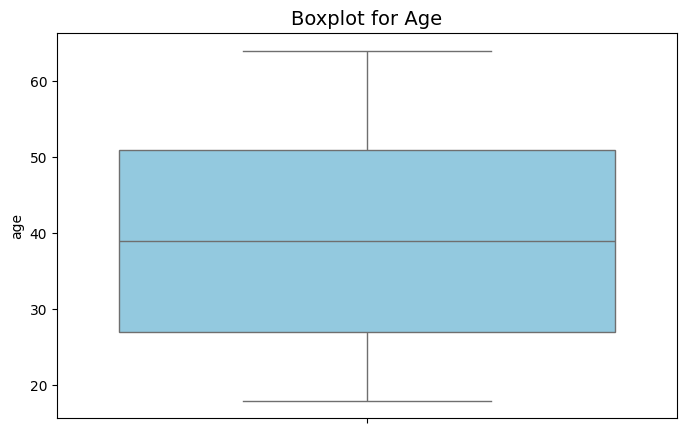

Removing outliers in 'age'...


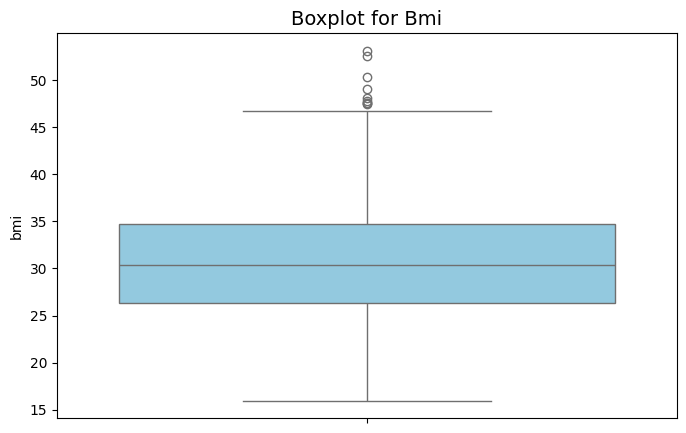

Removing outliers in 'bmi'...


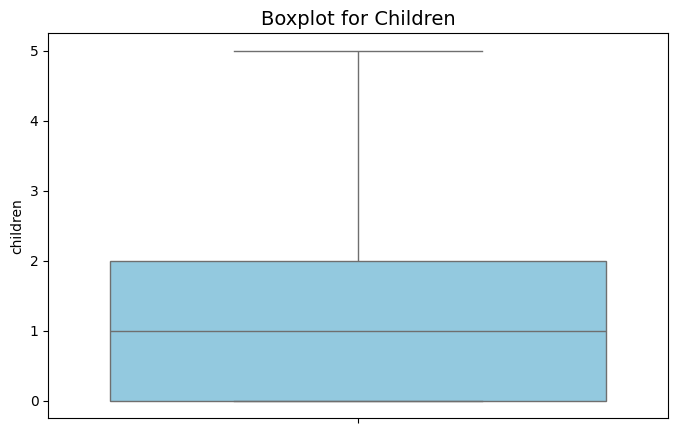

Removing outliers in 'children'...


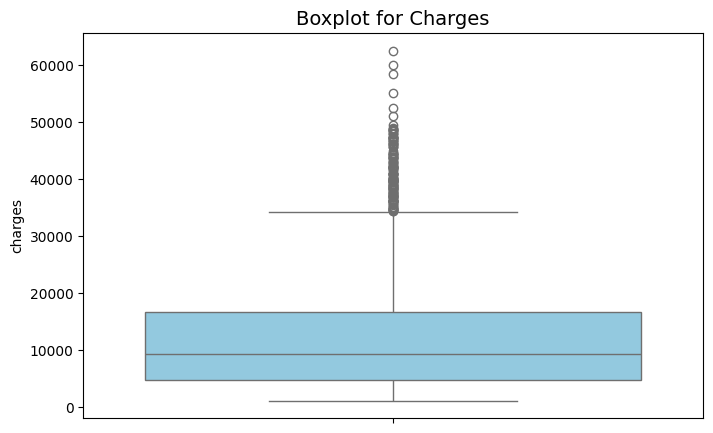

Removing outliers in 'charges'...

Dataset Shape After Outlier Removal: (1190, 7)


In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 6: Outlier analysis
*******************************
'''

# Continuous columns for outlier analysis
quantitative_columns = ['age', 'bmi', 'children', 'charges']

# Define a function for outlier removal
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # 1st Quartile
    Q3 = data[column].quantile(0.75)  # 3rd Quartile
    IQR = Q3 - Q1                     # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR      # lower bound formula
    upper_bound = Q3 + 1.5 * IQR      # upper bound formula
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Ploting and removing outliers for each quantitative column
for column in quantitative_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[column], color='skyblue')
    plt.title(f'Boxplot for {column.capitalize()}', fontsize=14)
    plt.show()

    print(f"Removing outliers in '{column}'...")
    data = remove_outliers(data, column)

# Print the shape of the dataset after outlier removal
print("\nDataset Shape After Outlier Removal:", data.shape)


In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 7: Missing values analysis
*******************************
'''

# Analise missing values
print("Missing Values per Column:")
print(data.isnull().sum())

# Treat missing values
# Continuous Variables: Median Imputation
for column in ['age', 'bmi', 'children', 'charges']:
    if data[column].isnull().sum() > 0:
        median_value = data[column].median()
        data[column].fillna(median_value, inplace=True)
        print(f"Imputed missing values in '{column}' with median: {median_value}")

# Categorical Variables: Mode Imputation
for column in ['sex', 'smoker', 'region']:
    if data[column].isnull().sum() > 0:
        mode_value = data[column].mode()[0]
        data[column].fillna(mode_value, inplace=True)
        print(f"Imputed missing values in '{column}' with mode: {mode_value}")

# Verify no missing values remain
print("\nMissing Values After Treatment:")
print(data.isnull().sum())


Missing Values per Column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Missing Values After Treatment:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


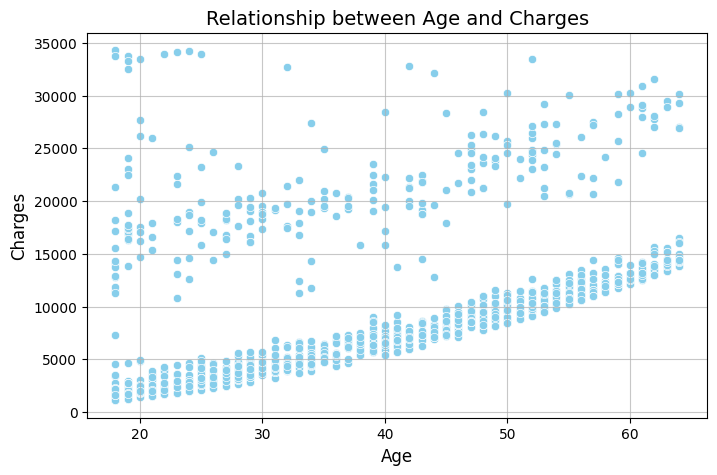

Pearson's Correlation between age and charges: 0.45


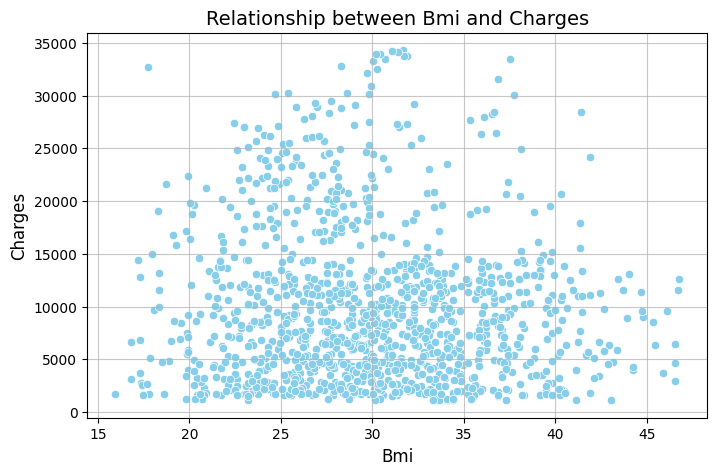

Pearson's Correlation between bmi and charges: -0.06


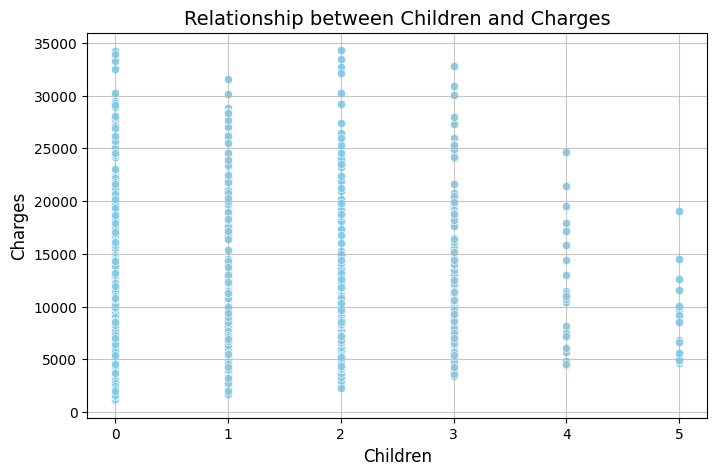

Pearson's Correlation between children and charges: 0.09


In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 8: Feature selection - Visual and statistic correlation analysis for selection of best features
*******************************
'''

from scipy.stats import pearsonr

# Scatter plots and Pearson's correlation
continuous_columns = ['age', 'bmi', 'children']

for column in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=column, y='charges', color='skyblue')
    plt.title(f'Relationship between {column.capitalize()} and Charges', fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Charges', fontsize=12)
    plt.grid(alpha=0.7)
    plt.show()

    # Calculate and print Pearson's correlation
    corr, _ = pearsonr(data[column], data['charges'])
    print(f"Pearson's Correlation between {column} and charges: {corr:.2f}")


<ipython-input-34-8de2b17e25d3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=column, y='charges', palette='Set2', legend=False)


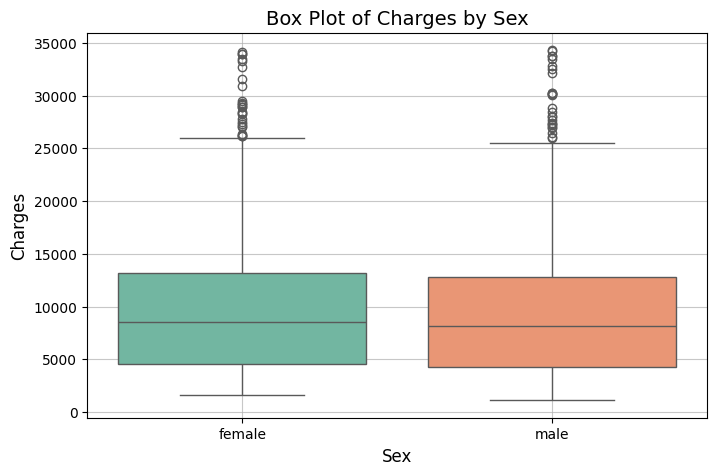

<ipython-input-34-8de2b17e25d3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=column, y='charges', palette='Set2', legend=False)


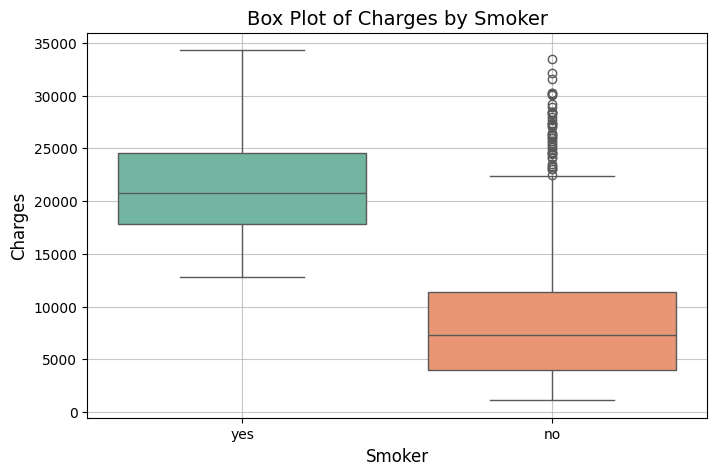

<ipython-input-34-8de2b17e25d3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=column, y='charges', palette='Set2', legend=False)


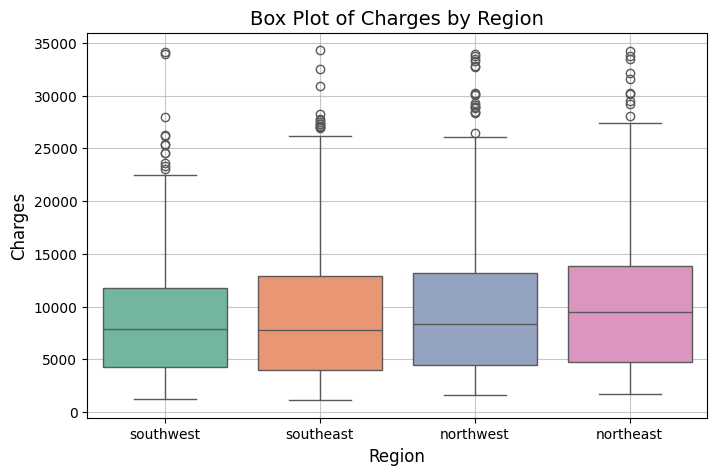

In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 8: Feature selection - Visual and statistic correlation analysis for selection of best features
*******************************
'''

# Box plots for categorical variables
categorical_columns = ['sex', 'smoker', 'region']

# Corrected Box Plots for Categorical Predictors vs. Target
for column in ['sex', 'smoker', 'region']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x=column, y='charges', palette='Set2', legend=False)
    plt.title(f'Box Plot of Charges by {column.capitalize()}', fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Charges', fontsize=12)
    plt.grid(alpha=0.7)
    plt.show()

In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 9: Statistical feature selection (categorical vs. continuous) using ANOVA test
*******************************
'''

from scipy.stats import f_oneway

# Categorical columns for ANOVA test
categorical_columns = ['sex', 'smoker', 'region']

# Perform ANOVA test for each categorical predictor
for column in categorical_columns:
    # Group charges by the categorical variable
    groups = [data[data[column] == group]['charges'] for group in data[column].unique()]

    # Perform ANOVA test
    f_stat, p_value = f_oneway(*groups)

    print(f"ANOVA Test for {column.capitalize()}:")
    print(f"F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

    # Interpret the p-value
    if p_value < 0.05:
        print(f"Result: Reject Null Hypothesis - Significant relationship exists.\n")
    else:
        print(f"Result: Fail to Reject Null Hypothesis - No significant relationship.\n")


ANOVA Test for Sex:
F-statistic = 0.57, p-value = 0.4499
Result: Fail to Reject Null Hypothesis - No significant relationship.

ANOVA Test for Smoker:
F-statistic = 655.26, p-value = 0.0000
Result: Reject Null Hypothesis - Significant relationship exists.

ANOVA Test for Region:
F-statistic = 3.85, p-value = 0.0094
Result: Reject Null Hypothesis - Significant relationship exists.



In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 10: Selecting final predictors/features for building machine learning/AI model
*******************************
'''

# Select final features for the model
final_features = ['age', 'bmi', 'smoker', 'region', 'charges']

# Create a new DataFrame with selected features
final_data = data[final_features]

# Display the first few rows of the final dataset
print("Final Dataset for Modeling:")
print(final_data.head())



Final Dataset for Modeling:
   age     bmi smoker     region      charges
0   19  27.900    yes  southwest  16884.92400
1   18  33.770     no  southeast   1725.55230
2   28  33.000     no  southeast   4449.46200
3   33  22.705     no  northwest  21984.47061
4   32  28.880     no  northwest   3866.85520


In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 11: Data conversion to numeric values for machine learning/predictive analysis
*******************************
'''

# Convert categorical variables to numeric using get_dummies
final_data_encoded = pd.get_dummies(final_data, columns=['smoker', 'region'], drop_first=True)

# Display the first few rows of the converted dataset
print("Data after Conversion to Numeric:")
print(final_data_encoded.head())


Data after Conversion to Numeric:
   age     bmi      charges  smoker_yes  region_northwest  region_southeast  \
0   19  27.900  16884.92400        True             False             False   
1   18  33.770   1725.55230       False             False              True   
2   28  33.000   4449.46200       False             False              True   
3   33  22.705  21984.47061       False              True             False   
4   32  28.880   3866.85520       False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             False  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate predictors (X) and target (y)
X = final_data_encoded.drop(columns=['charges'])
y = final_data_encoded['charges']

# Train/Test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of Train/Test Splits:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData standardization complete. The training data is now scaled.")


Shapes of Train/Test Splits:
X_train: (952, 6), X_test: (238, 6)
y_train: (952,), y_test: (238,)

Data standardization complete. The training data is now scaled.


In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 13: Investigating multiple regression algorithm
*******************************
'''

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialise models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR()  # Optional
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Save results
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)



Model Performance Comparison:
                           MAE         RMSE        R2
Linear Regression  2775.588356  4772.701172  0.527433
Decision Tree      2900.085758  5840.032832  0.292436
Random Forest      2753.914299  4931.694055  0.495423
AdaBoost           4071.145400  5248.446396  0.428526
KNN                2798.769010  4870.981965  0.507770
SVR                5247.065472  7182.866606 -0.070362


In [ ]:
'''
*******************************
Author: Beau, Shahriar
u123456 Assessment 1_Program1_(a) 06/ 03/2024
Programming: Step 14: Selection of the best model
*******************************
'''

# Identify the model with the highest R² score
best_model_name = results_df['R2'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

# Display the best model and its metrics
print(f"The best model is: {best_model_name}")
print(f"Metrics of the best model:")
print(best_model_metrics)




The best model is: Linear Regression
Metrics of the best model:
MAE     2775.588356
RMSE    4772.701172
R2         0.527433
Name: Linear Regression, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
import joblib

# Retrain the model using all data
final_model = LinearRegression()
X_full = scaler.fit_transform(X)  # Scale the features
y_full = y
final_model.fit(X_full, y_full)

# Save the model
joblib.dump(final_model, 'best_model.pkl')
print("Model saved as 'best_model.pkl'.")


In [ ]:
import tkinter as tk
from tkinter import messagebox
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('best_model.pkl')

# Prediction function
def predict_charges():
    try:
        age = int(entry_age.get())
        bmi = float(entry_bmi.get())
        smoker = var_smoker.get()
        region = var_region.get()

        # Prepare the input data
        input_data = {
            'age': [age],
            'bmi': [bmi],
            'smoker_yes': [1 if smoker == 'yes' else 0],
            'region_northwest': [1 if region == 'northwest' else 0],
            'region_southeast': [1 if region == 'southeast' else 0],
            'region_southwest': [1 if region == 'southwest' else 0],
        }
        input_df = pd.DataFrame(input_data)

        # Make prediction
        prediction = model.predict(input_df)[0]

        # Display the result
        messagebox.showinfo("Prediction", f"Predicted Insurance Charges: ${prediction:.2f}")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create the TkInter GUI
app = tk.Tk()
app.title("Insurance Charges Prediction")

# Age input
tk.Label(app, text="Age:").grid(row=0, column=0, padx=10, pady=5)
entry_age = tk.Entry(app)
entry_age.grid(row=0, column=1, padx=10, pady=5)

# BMI input
tk.Label(app, text="BMI:").grid(row=1, column=0, padx=10, pady=5)
entry_bmi = tk.Entry(app)
entry_bmi.grid(row=1, column=1, padx=10, pady=5)

# Smoker input
tk.Label(app, text="Smoker:").grid(row=2, column=0, padx=10, pady=5)
var_smoker = tk.StringVar(value="no")
tk.OptionMenu(app, var_smoker, "yes", "no").grid(row=2, column=1, padx=10, pady=5)

# Region input
tk.Label(app, text="Region:").grid(row=3, column=0, padx=10, pady=5)
var_region = tk.StringVar(value="northeast")
tk.OptionMenu(app, var_region, "northeast", "northwest", "southeast", "southwest").grid(row=3, column=1, padx=10, pady=5)

# Predict button
tk.Button(app, text="Predict", command=predict_charges).grid(row=4, columnspan=2, pady=10)

# Run the app
app.mainloop()
